## Searching algorithms

<ol>
<li>Implement a basic structure for a Binary Search Tree (BST).</li>
<li>Populate the BST with 24 random elements.</li>
<li>Implement a search function to check if a particular number exists in the BST.</li>
<li>Visualize the BST.</li>
</ol>

In [1]:
import random

# Step 1: Implement the BST

class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

class BinarySearchTree:
    def __init__(self):
        self.root = None

    # Insert a new node with the given key
    def insert(self, key):
        # If the tree is empty, return a new node
        if self.root is None:
            self.root = Node(key)
        else:
            # Otherwise, recur down the tree
            self._insert_recursively(self.root, key)

    def _insert_recursively(self, current_node, key):
        # If the tree is empty, return a new node
        if current_node is None:
            return Node(key)

        # Otherwise, recur down the tree
        if key < current_node.val:
            current_node.left = self._insert_recursively(current_node.left, key)
        else:
            current_node.right = self._insert_recursively(current_node.right, key)

        return current_node

# Step 2: Populate the BST with 24 random elements

bst = BinarySearchTree()
elements = random.sample(range(1, 100), 24)

for el in elements:
    bst.insert(el)

elements

[91,
 69,
 72,
 3,
 37,
 97,
 73,
 71,
 32,
 35,
 36,
 49,
 50,
 86,
 80,
 65,
 22,
 74,
 85,
 5,
 20,
 25,
 67,
 54]

In [2]:
# Step 3: Implement the Search Function

def search_in_bst(node, key):
    # If the current node is null or the key is present at the root, return the node
    if node is None or node.val == key:
        return node

    # If the key is greater than the root's key, recur on the right subtree
    if key > node.val:
        return search_in_bst(node.right, key)
    
    # If the key is smaller than the root's key, recur on the left subtree
    return search_in_bst(node.left, key)

# Test the search function
test_key = elements[23]
result_node = search_in_bst(bst.root, test_key)
print(test_key)
bool(result_node)  # This will return True if the node is found, otherwise False

54


True

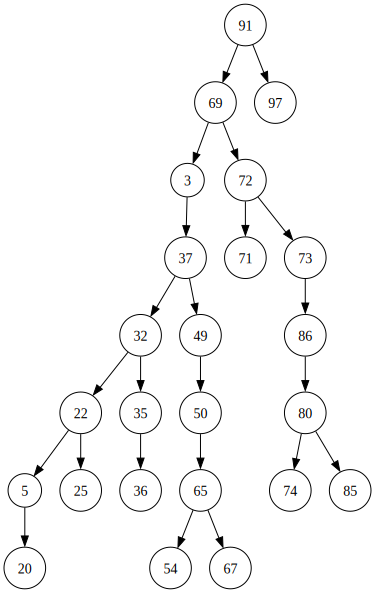

In [4]:
from graphviz import Digraph

def visualize_tree(node, graph=None):
    if graph is None:
        graph = Digraph('BST', node_attr={'shape': 'circle', 'height': '.1'})
        
    if node.left:
        graph.edge(str(node.val), str(node.left.val))
        visualize_tree(node.left, graph)
    if node.right:
        graph.edge(str(node.val), str(node.right.val))
        visualize_tree(node.right, graph)
    return graph

tree_graph = visualize_tree(bst.root)
tree_graph

In [5]:
def inorder_traversal(node):
    """Perform in-order traversal and return the nodes in a list."""
    return inorder_traversal(node.left) + [node.val] + inorder_traversal(node.right) if node else []

sorted_elements = inorder_traversal(bst.root)
sorted_elements

[3,
 5,
 20,
 22,
 25,
 32,
 35,
 36,
 37,
 49,
 50,
 54,
 65,
 67,
 69,
 71,
 72,
 73,
 74,
 80,
 85,
 86,
 91,
 97]

In [6]:
# Reconstructing the BST from the previous steps
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, key):
        if self.root is None:
            self.root = Node(key)
        else:
            self._insert_recursively(self.root, key)

    def _insert_recursively(self, current_node, key):
        if current_node is None:
            return Node(key)

        if key < current_node.val:
            current_node.left = self._insert_recursively(current_node.left, key)
        else:
            current_node.right = self._insert_recursively(current_node.right, key)

        return current_node

# Populate the BST with the previously generated elements
bst = BinarySearchTree()
for el in sorted_elements:
    bst.insert(el)

# Perform in-order traversal to get the sorted elements
def inorder_traversal(node):
    return inorder_traversal(node.left) + [node.val] + inorder_traversal(node.right) if node else []

sorted_elements = inorder_traversal(bst.root)
sorted_elements

[3,
 5,
 20,
 22,
 25,
 32,
 35,
 36,
 37,
 49,
 50,
 54,
 65,
 67,
 69,
 71,
 72,
 73,
 74,
 80,
 85,
 86,
 91,
 97]

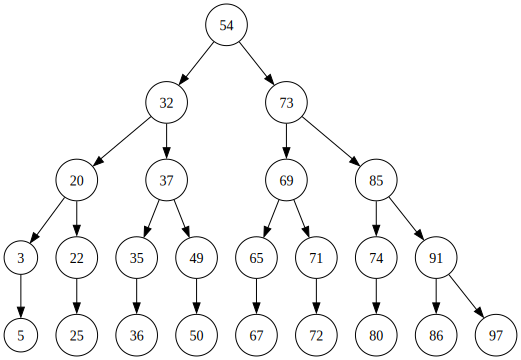

In [7]:
def sorted_array_to_bst(start, end, sorted_elements):
    """Recursively construct a balanced BST from a sorted array."""
    # Base condition
    if start > end:
        return None

    # Find the middle of the array and make it the root
    mid = (start + end) // 2
    node = Node(sorted_elements[mid])

    # Recursively construct the left and right subtrees
    node.left = sorted_array_to_bst(start, mid - 1, sorted_elements)
    node.right = sorted_array_to_bst(mid + 1, end, sorted_elements)

    return node

# Constructing the balanced BST
balanced_bst = BinarySearchTree()
balanced_bst.root = sorted_array_to_bst(0, len(sorted_elements) - 1, sorted_elements)

# Visualizing the balanced BST
balanced_tree_graph = visualize_tree(balanced_bst.root)
balanced_tree_graph


In [8]:
# Test the search function
test_key = elements[23]
result_node = search_in_bst(bst.root, test_key)
print(test_key)
bool(result_node)  # This will return True if the node is found, otherwise False

54


True

In [9]:
def search_in_bst_with_count(node, key):
    """Search the BST and return the number of comparisons made."""
    if (node is None) or (node.val == key):
        print("=", node.val, key)
        return (node, 1)

    if key > node.val:
        print("R", node.val, key)
        found_node, count = search_in_bst_with_count(node.right, key)
    else:
        print("L", node.val, key)
        found_node, count = search_in_bst_with_count(node.left, key)

    return (found_node, count + 1)

# Test the modified search function
test_key = elements[23]
result_node, comparisons = search_in_bst_with_count(balanced_bst.root, test_key)
print(test_key, comparisons)
bool(result_node)  # This will return True if the node is found, otherwise False

= 54 54
54 1


True